# POSTTEST 2
### Silvia Ananda(2009106120)

Import Package yang dibutuhkan

In [2]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Menampilkan panjang data testing dan training

In [4]:
print(f'panjang x train : {len(x_train_raw)}',
    f'panjang y train : {len(y_train_raw)}',
    f'panjang x test : {len(x_test_raw)}',
    f'panjang y test : {len(y_test_raw)}',
    sep='\n')

panjang x train : 60000
panjang y train : 60000
panjang x test : 10000
panjang y test : 10000


Menampilkan gambar yang ke-10

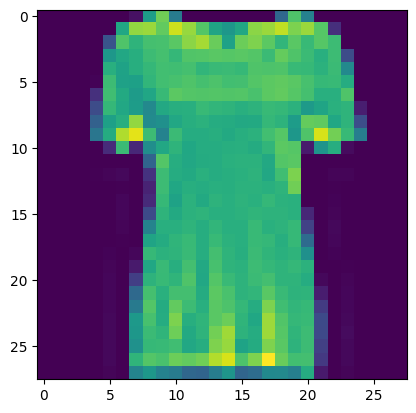

In [5]:
plt.imshow(x_train_raw[10])

In [6]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
x_train_raw.shape

(60000, 28, 28)

Reshape Gambar

In [8]:
x_train = tf.reshape(x_train_raw, [60000, 784])
x_test = tf.reshape(x_test_raw, [10000, 784])

In [9]:
x_train = tf.cast(x_train, tf.float32)/300
x_test = tf.cast(x_test, tf.float32)/300

Membuat model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

Training Model

In [13]:
history = model.fit(
    x_train, y_train,
    epochs =20, steps_per_epoch=10,
    verbose =2,
    validation_data=(x_test, y_test)
)

Epoch 1/20
10/10 - 0s - loss: 0.4022 - accuracy: 0.8615 - val_loss: 0.4403 - val_accuracy: 0.8468 - 378ms/epoch - 38ms/step
Epoch 2/20
10/10 - 0s - loss: 0.3987 - accuracy: 0.8644 - val_loss: 0.4383 - val_accuracy: 0.8462 - 306ms/epoch - 31ms/step
Epoch 3/20
10/10 - 0s - loss: 0.3959 - accuracy: 0.8644 - val_loss: 0.4353 - val_accuracy: 0.8489 - 311ms/epoch - 31ms/step
Epoch 4/20
10/10 - 0s - loss: 0.3940 - accuracy: 0.8648 - val_loss: 0.4356 - val_accuracy: 0.8467 - 312ms/epoch - 31ms/step
Epoch 5/20
10/10 - 0s - loss: 0.3919 - accuracy: 0.8651 - val_loss: 0.4311 - val_accuracy: 0.8497 - 336ms/epoch - 34ms/step
Epoch 6/20
10/10 - 0s - loss: 0.3896 - accuracy: 0.8658 - val_loss: 0.4328 - val_accuracy: 0.8481 - 343ms/epoch - 34ms/step
Epoch 7/20
10/10 - 0s - loss: 0.3875 - accuracy: 0.8658 - val_loss: 0.4289 - val_accuracy: 0.8508 - 319ms/epoch - 32ms/step
Epoch 8/20
10/10 - 0s - loss: 0.3845 - accuracy: 0.8682 - val_loss: 0.4265 - val_accuracy: 0.8508 - 312ms/epoch - 31ms/step
Epoch 9/

History

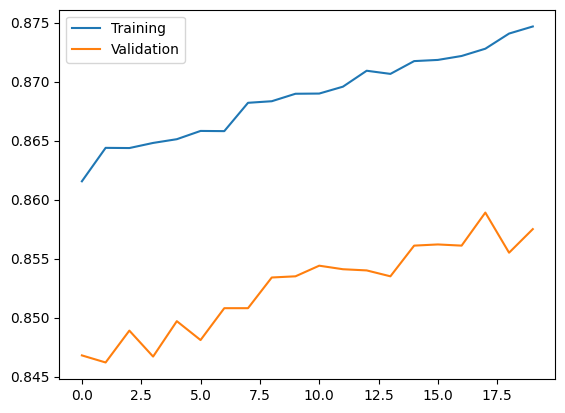

In [14]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'],label='Training')
plt.plot(nilai_x, history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [15]:
model.save('model/model.h5')

In [16]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Evaluasi Model

In [17]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 0s 631us/step - loss: 0.4104 - accuracy: 0.8575


[0.4103600084781647, 0.8575000166893005]

In [18]:
hasil = model_saved.predict(x_train)

1875/1875 [==============================] - 1s 532us/step


In [19]:
hasil

array([[6.92136459e-10, 6.02973713e-11, 2.09845641e-10, ...,
        4.54388966e-04, 3.40295605e-06, 9.99475658e-01],
       [9.90786612e-01, 2.58713021e-06, 7.56768568e-05, ...,
        6.48396755e-13, 2.13151338e-06, 4.35663745e-12],
       [3.22001219e-01, 5.06723523e-02, 6.37081861e-02, ...,
        2.23009585e-04, 7.81711470e-03, 1.14971226e-04],
       ...,
       [1.43051977e-04, 3.61719649e-05, 6.41040751e-05, ...,
        1.24003439e-08, 4.43732024e-05, 6.73061784e-09],
       [6.11501336e-01, 3.55164558e-02, 1.67743996e-01, ...,
        1.28593183e-05, 1.08128339e-02, 2.18343257e-06],
       [1.14575625e-04, 5.63990795e-07, 1.05256484e-04, ...,
        1.29954447e-03, 5.65671769e-04, 9.19418817e-05]], dtype=float32)

In [20]:
x_train.shape

TensorShape([60000, 784])

In [21]:
hasil.shape

(60000, 10)

In [22]:
tf.argmax(hasil[4]).numpy()

3

In [23]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

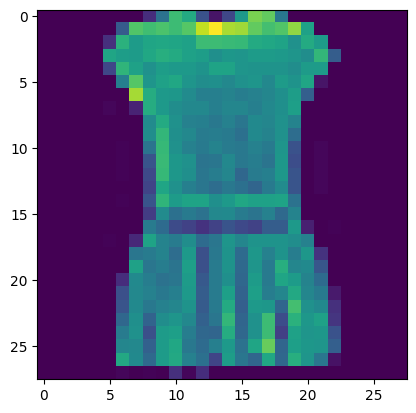

In [24]:
plt.imshow(x_train_raw[3])